# New Section

In [ ]:
#A reduced dataset containing ~600 images per class was created from the original dataset and upload to google drive to train this model
# #connect to google drive to access the dataset on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.75G/1.76G [00:08<00:00, 218MB/s]
100% 1.76G/1.76G [00:08<00:00, 219MB/s]


In [ ]:
!ls

drive	     lung-and-colon-cancer-histopathological-images.zip
kaggle.json  sample_data


In [ ]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# import packages
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
import os
import pickle
import csv

In [ ]:
images = []
labels = []
limit=600 
img_size=256

#path for colon dataset
main_path2='./lung_colon_image_set/colon_image_sets/'
folder_names = []
        
for entry_name in os.listdir('./lung_colon_image_set/colon_image_sets/'):
    print(entry_name)
    entry_path = os.path.join('./lung_colon_image_set/colon_image_sets/', entry_name)
    if os.path.isdir(entry_path):
        print(entry_path)
        folder_names.append(entry_name)      
        
print('The Categories are',folder_names)

j=0

#read images and labels from each folder

for folder in folder_names:
    for filename in os.listdir(os.path.join(main_path2,folder)):
        img_path = os.path.join(main_path2,folder)
        img = cv2.imread(os.path.join(img_path,filename)) 
        if img is not None:
            img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
            img = cv2.resize(img,(img_size, img_size))
            images.append(img)
            if folder == 'colon_aca':
                labels.append(1)
                #print('aca')
            elif folder == 'colon_n':
               labels.append(0)
                #print('normal')
        j=j+1
        if j >= limit:
            j=0
            break
                        
images,labels=np.array(images),np.array(labels)
print(images.shape)
#print(labels)

colon_aca
./lung_colon_image_set/colon_image_sets/colon_aca
colon_n
./lung_colon_image_set/colon_image_sets/colon_n
The Categories are ['colon_aca', 'colon_n']
(1200, 256, 256)


In [ ]:
print(labels.shape)

(1200,)


In [ ]:
#gather features

#Obtaining Variance of images
kernel = np.ones((3,3),np.uint8)
#print(kernel)
var_vector = np.empty((limit*2,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    var_vector[i] = np.var(x)
    i=i+1
print(var_vector[6])

#Obtaining Mean of images
mean_vector = np.empty((limit*2,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    mean_vector[i] = np.mean(x)
    i=i+1
print(mean_vector[6])

#Obtaining Standard Deviation of images
std_vector = np.empty((limit*2,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    std_vector[i] = np.std(x)
    i=i+1
print(std_vector[6])

skew_vector = np.empty((limit*2,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    skew_vector[i] = stats.skew(x)
    i=i+1
print(skew_vector[6])

#Obtaining Kurtosis of images
kurto_vector = np.empty((limit*2,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    kurto_vector[i] = stats.kurtosis(x)
    i=i+1
print(kurto_vector[6])

#Obtaining Entropy of images
entropy_vector = np.empty((limit*2,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    entropy_vector[i] = stats.entropy(x)
    i=i+1
print(entropy_vector[6])
print(np.shape(entropy_vector))

#Obtaining Canny edges
canny_vector = np.empty((limit*2,img_size*img_size))
i = 0
for image in images:
    canny = cv2.Canny(image,40,200)
    canny_vector[i] = np.array(canny.flatten())
    i=i+1
print(np.shape(canny_vector))


#Obtaining Sobel X
sobelX_vector = np.empty((limit*2,img_size*img_size))
i = 0
for image in images:
    sobelX = cv2.Sobel(image,cv2.CV_8UC1,1,0,ksize=5)
    sobelX_vector[i] = np.array(sobelX.flatten())
    i=i+1
    
#Obtaining Sobel Y
sobelY_vector = np.empty((limit*2,img_size*img_size))
i = 0
for image in images:
    sobelY = cv2.Sobel(image,cv2.CV_8UC1,0,1,ksize=5)
    sobelY_vector[i] = np.array(sobelY.flatten())
    i=i+1

[69951.10194541]
[257.00392157]
[264.48270633]
[0.84841565]
[-0.41032343]
[4.99015157]
(1200, 1)
(1200, 65536)


In [ ]:
print(np.shape(sobelY_vector))
print(np.shape(sobelX_vector))

(1200, 65536)
(1200, 65536)


In [ ]:
#create a feature vector

feature_vector = np.empty((limit*2,0))
feature_vector=np.append(feature_vector,mean_vector,axis=1)
feature_vector=np.append(feature_vector,var_vector,axis=1)
feature_vector=np.append(feature_vector,std_vector,axis=1)
feature_vector=np.append(feature_vector,skew_vector,axis=1)
feature_vector=np.append(feature_vector,kurto_vector,axis=1)
feature_vector=np.append(feature_vector,entropy_vector,axis=1)
feature_vector=np.append(feature_vector,canny_vector,axis=1)
feature_vector=np.append(feature_vector,sobelX_vector,axis=1)
feature_vector=np.append(feature_vector,sobelY_vector,axis=1)
#feature_vector=np.append(feature_vector,hog_features,axis=1)
print(np.shape(feature_vector))
#print(feature_vector[0])
#feature_vector=np.append(feature_vector,,axis=1)

(1200, 196614)


In [ ]:
print(labels.shape)

(1200,)


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(feature_vector,labels,test_size=0.2,shuffle=True)#80% training

from sklearn.model_selection import cross_val_score

print(xtrain.shape)

(960, 196614)


# Random Forest Classifier

In [ ]:
#train 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators':[100, 500, 1000, 2000, 3000], 'max_depth':[20, 50, 100], 'criterion': [‘entropy’, ‘gini’]}
clf = RandomForestClassifier(n_estimators = 2000, criterion='entropy', max_depth = 20)
#rf = RandomForestClassifier()
#clf = GridSearchCV(rf, parameters)

#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
#cm = confusion_matrix(ytest, ypredict2)


Train Accuracy: 1.0


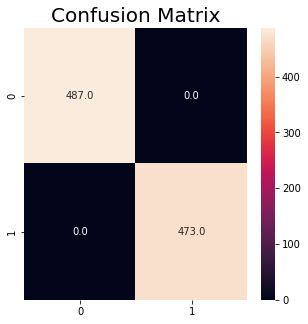

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       473

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [ ]:
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:
#test

ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.5916666666666667


In [ ]:
print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65       113
           1       0.71      0.39      0.50       127

    accuracy                           0.59       240
   macro avg       0.63      0.60      0.58       240
weighted avg       0.63      0.59      0.57       240



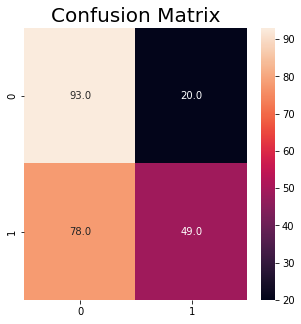

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [ ]:
y_proba = clf.predict_proba(xtest)
import matplotlib.pyplot as plt  
from sklearn import metrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


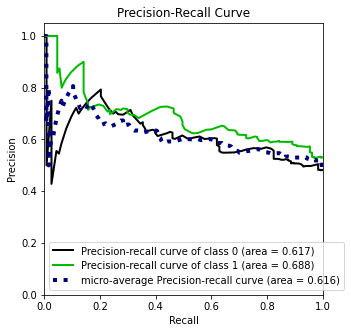

In [ ]:
#plot PR curve

!pip install scikit-plot
import scikitplot as skplt
plot=skplt.metrics.plot_precision_recall(ytest, y_proba)

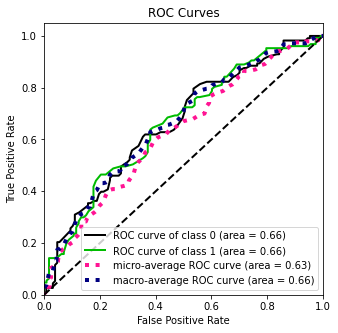

In [ ]:
#plot AUCROC curve
plot = skplt.metrics.plot_roc(ytest, y_proba)

# XGB Classifier

Train Accuracy: 0.996875


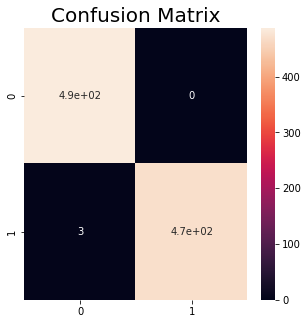

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost as xgb

xb = xgb.XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
#clf = RandomForestClassifier()
xb.fit(xtrain, ytrain)
ypredict = xb.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [ ]:
ypredict2 = xb.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.5666666666666667


In [ ]:
print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       113
           1       0.60      0.54      0.57       127

    accuracy                           0.57       240
   macro avg       0.57      0.57      0.57       240
weighted avg       0.57      0.57      0.57       240



# SVM

Train Accuracy: 0.8427083333333333


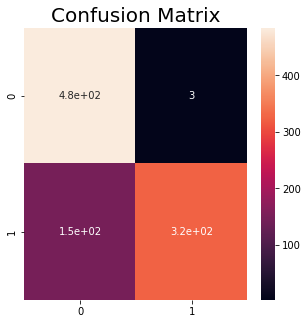

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

clf = svm.SVC(kernel = "poly", random_state=0, probability = True,decision_function_shape='ovo', degree=2)

#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
#print(classification_report(ytrain,ypredict))

Test Accuracy: 0.5833333333333334


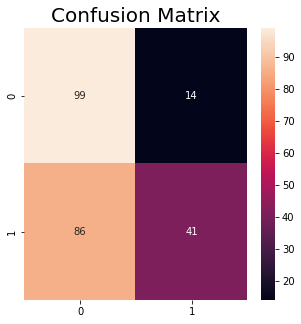

In [ ]:
ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [ ]:
print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.54      0.88      0.66       113
           1       0.75      0.32      0.45       127

    accuracy                           0.58       240
   macro avg       0.64      0.60      0.56       240
weighted avg       0.65      0.58      0.55       240



# Decision Tree Classifier

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = DecisionTreeClassifier(max_depth = 20, criterion='gini')



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)


Train Accuracy: 1.0


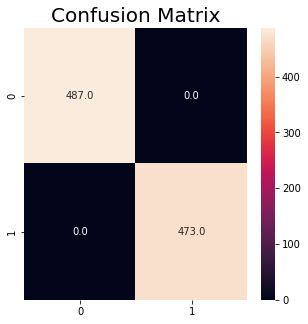

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       473

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [ ]:

cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:

ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.525


In [ ]:
print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53       113
           1       0.56      0.50      0.53       127

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.53      0.53      0.53       240



# Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = GaussianNB()



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)


Train Accuracy: 0.940625


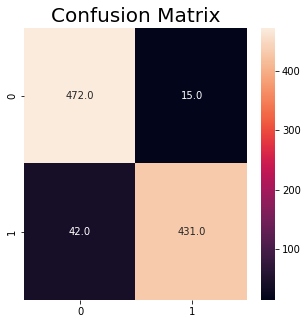

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       487
           1       0.97      0.91      0.94       473

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960



In [ ]:


cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:


ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.6375


In [ ]:

print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       113
           1       0.64      0.73      0.68       127

    accuracy                           0.64       240
   macro avg       0.64      0.63      0.63       240
weighted avg       0.64      0.64      0.63       240



# KNN

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = KNeighborsClassifier(n_neighbors=3)



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)



Train Accuracy: 0.646875


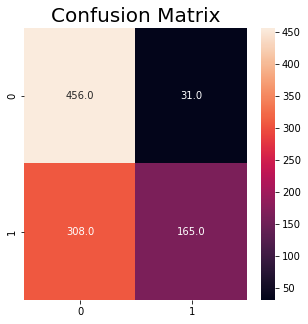

              precision    recall  f1-score   support

           0       0.60      0.94      0.73       487
           1       0.84      0.35      0.49       473

    accuracy                           0.65       960
   macro avg       0.72      0.64      0.61       960
weighted avg       0.72      0.65      0.61       960



In [ ]:
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:




ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.5291666666666667


In [ ]:

print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.50      0.96      0.66       113
           1       0.79      0.15      0.25       127

    accuracy                           0.53       240
   macro avg       0.65      0.55      0.45       240
weighted avg       0.65      0.53      0.44       240

